In [1]:
### IMPORT STATEMENTS 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit = pd.read_csv("/Users/kodevybe/Programs_Codes_Projects/Kaggle/Data/creditcard.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



### INSIGHTS ABOUT DATA:

Time and amount are the only features with their original values rest of the features are scaled for PCA transformation. Also these scaled valued features are unknown, in the sense we don't know what they represent.<br>

In [3]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


we see that mean for the "amount" feature is quite low i.e. 88 and the highest is 25691

In [4]:
credit.isnull().sum().max()

0

Text(0.5, 1.0, 'Class distribution \n 0 represents "No fraud" where as 1 represents "fraud cases" ')

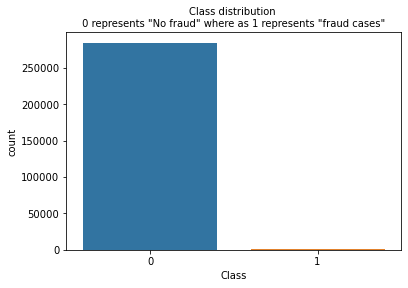

In [5]:
sns.countplot('Class', data=credit)
plt.title('Class distribution \n 0 represents "No fraud" where as 1 represents "fraud cases" ', fontsize=10)


We witness that we have got class imbalance in our dataset. 

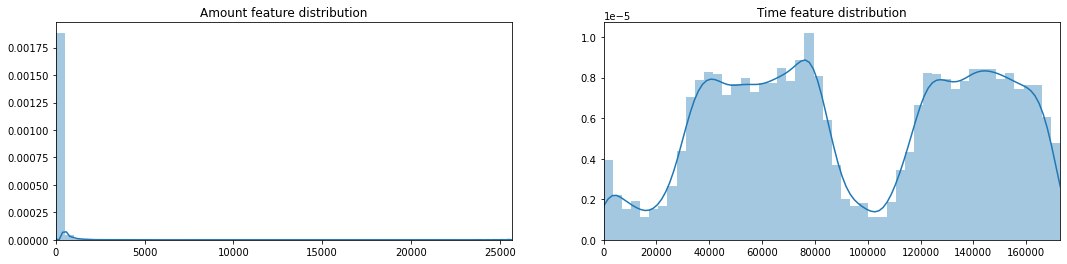

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit['Amount'].values
time_val = credit['Time'].values

sns.distplot(amount_val, ax=ax[0])
ax[0].set_title('Amount feature distribution')
ax[0].set_xlim(min(amount_val), max(amount_val))

sns.distplot(time_val, ax=ax[1])
ax[1].set_title('Time feature distribution')
ax[1].set_xlim(min(time_val),max(time_val))

plt.show()

Above we see the distribution of our Amount and Time feature

In [7]:
### Scale the Time and Amount feature to make the dataset consistent

from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rb_scaler = RobustScaler()

credit['scaled_amount']= rb_scaler.fit_transform(credit['Amount'].to_numpy().reshape(-1,1))
credit['scaled_time']= rb_scaler.fit_transform(credit['Time'].to_numpy().reshape(-1,1))

#We will drop the original Amount and Time columns from credit Dataframe

credit.drop(['Amount', 'Time'], axis=1, inplace=True)


In [8]:
credit.shape

(284807, 31)

In [9]:
## Next rearrange the columns of credit Dataframe

scaled_amount = credit['scaled_amount']
scaled_time = credit['scaled_time']

credit.drop(['scaled_amount', 'scaled_time'], axis=1, inplace= True)

In [10]:
credit.shape

(284807, 29)

In [11]:
credit.insert(0, 'scaled_amount', scaled_amount)
credit.insert(1, 'scaled_time', scaled_time)
credit.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### SPLITTING THE DATASET

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
# credit['Class'].value_counts()[0]/len(credit) * 100

In [14]:
print('No Frauds', round(credit['Class'].value_counts()[0]/len(credit)*100, 2), '% of the dataset')
print('Frauds', round(credit['Class'].value_counts()[1]/len(credit)*100, 2), '% of the dataset')

X= credit.drop('Class', axis=1)
y= credit['Class']

sss= StratifiedKFold (n_splits=5, random_state=False, shuffle=False)

for train_index, test_index in sss.split(X,y):
    print ("Train", train_index, "Test", test_index)
    org_Xtrain, org_Xtest = X.iloc[train_index], X.iloc[test_index]
    org_ytrain, org_ytest = y.iloc[train_index], y.iloc[test_index] 
    
    
org_Xtrain = org_Xtrain.to_numpy()
org_Xtest = org_Xtest.to_numpy()
org_ytest = org_ytest.to_numpy()
org_ytrain = org_ytrain.to_numpy()

#let's determine if both train and test distributions has got equal label distribution

train_unique_label, train_count_label = np.unique(org_ytrain, return_counts=1)
test_unique_label, test_count_label = np.unique(org_ytest , return_counts=1)

print("-" *100)

print('label distribution')
print(train_count_label / len(org_ytrain))
print(test_count_label / len(org_ytest))



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train [ 30473  30496  31002 ... 284804 284805 284806] Test [    0     1     2 ... 57017 57018 57019]
Train [     0      1      2 ... 284804 284805 284806] Test [ 30473  30496  31002 ... 113964 113965 113966]
Train [     0      1      2 ... 284804 284805 284806] Test [ 81609  82400  83053 ... 170946 170947 170948]
Train [     0      1      2 ... 284804 284805 284806] Test [150654 150660 150661 ... 227866 227867 227868]
Train [     0      1      2 ... 227866 227867 227868] Test [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
label distribution
[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [15]:
# Since our classes are highly skewed we would make them equivalent in order
# to have normal distribution of the classes
#Random Undersampling

#shuffle dataset before creating the subsamples
credit = credit.sample (frac=1)

fraud_df = credit.loc[credit['Class']==1]
nofraud_df = credit.loc[credit['Class']==0][:492]

In [16]:
new_credit = pd.concat([fraud_df, nofraud_df])
new_credit = new_credit.sample(frac=1, random_state=40)

new_credit.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
243393,-0.307273,0.789765,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,...,-0.551121,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,1
238366,-0.279466,0.763026,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,...,0.369663,0.397058,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,1
38179,-0.289387,-0.533500,-0.468435,0.965177,1.257560,-0.150189,0.433961,0.271963,0.423634,0.371828,...,0.035070,-0.160955,-0.372259,0.032465,-0.347100,-0.350370,0.114903,0.273514,0.080465,0
102443,-0.293440,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
249963,-0.296653,0.821967,-0.679521,4.672553,-6.814798,7.143500,0.928654,-1.873013,-2.306689,0.993702,...,0.872006,0.566849,-0.321691,-0.281325,-1.120256,-0.073394,0.553530,0.760542,0.386742,1


### Let's visualize the distribution of our two classes after random undersampling

 

Distribution of the two classes in new_credit dataframe
1    0.5
0    0.5
Name: Class, dtype: float64


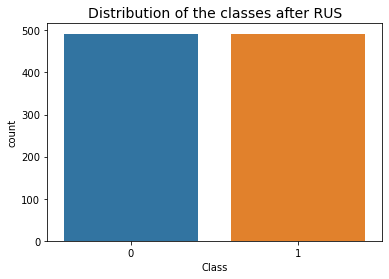

In [17]:
print('Distribution of the two classes in new_credit dataframe')
print(new_credit['Class'].value_counts()/len(new_credit))

sns.countplot('Class', data=new_credit)
plt.title('Distribution of the classes after RUS', fontsize=14)
plt.show()

### Correlation Matrice

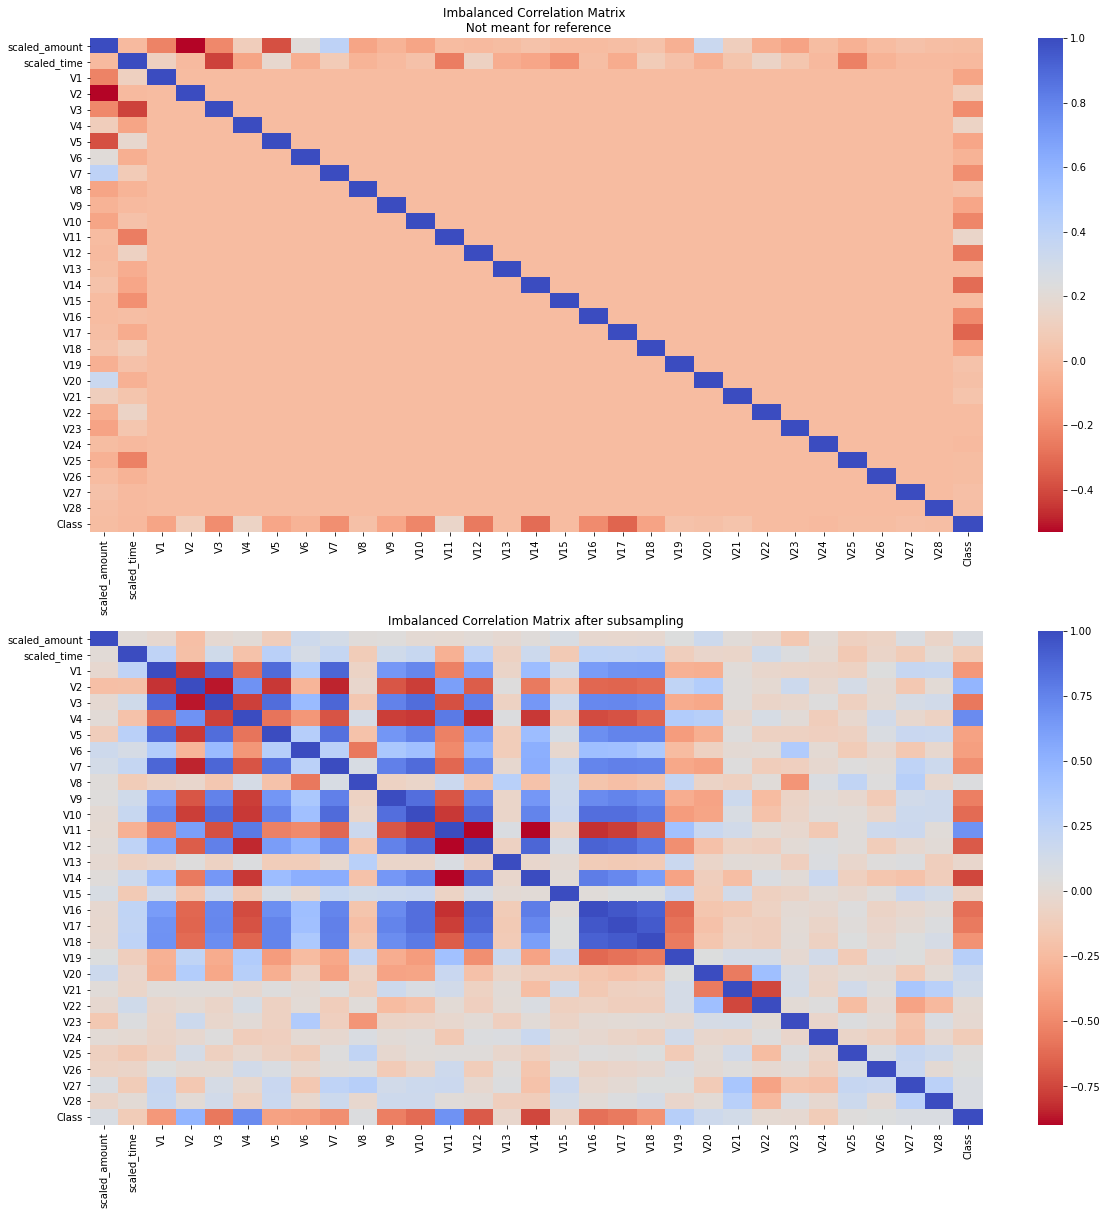

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))


corr = credit.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)
ax1.set_title ('Imbalanced Correlation Matrix \n Not meant for reference', fontsize=12)

subsamp_corr = new_credit.corr()
sns.heatmap(subsamp_corr, cmap='coolwarm_r', ax=ax2)
ax2.set_title ('Imbalanced Correlation Matrix after subsampling', fontsize=12)

plt.show()

In above correlaton matrix, it's paramount that we know which matrix should we look at for the correlation. We will consider the matrix obtained after subsampling because the first matrix is affected by the class imbalance. Hence, we can't correctly specify the correlation in the first matrix. Correlation matrix help us identify the features which influence heavily in whether a particular transactions is fraud. 

### We see above how features V2, V4, V11, V19 are positively correlated where as features V3, V10, V12, V14 are negatively correlated. <br>
### We employ Boxplots to illustrate the negative and positive correlation for a better understanding of the distribution of these features

Text(0.5, 1.0, 'V12 vs negative class correlation')

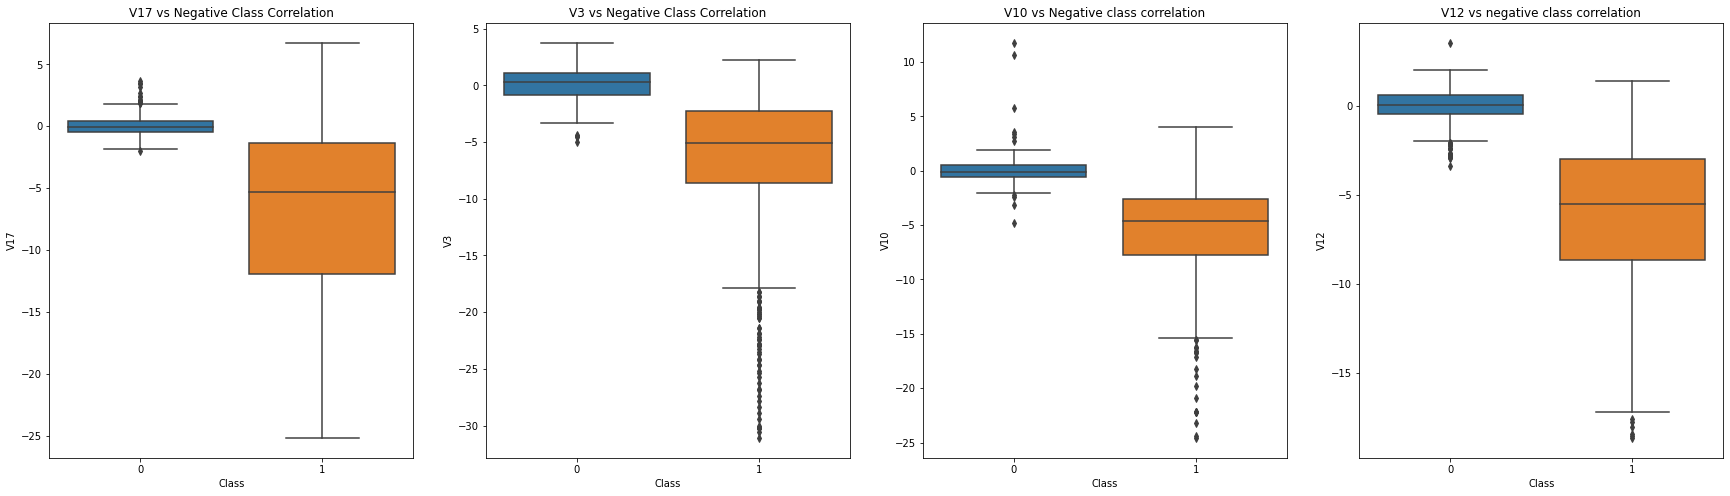

In [22]:
### NEGATIVE CORRELATION ILLUSTRATION
# Let's first illustrate the negative correlation 
# wherein the more negative the value of our feature, the more likely it will be a fraud transaction
fig, axes = plt.subplots (ncols=4, figsize=(30,8))

sns.boxplot(x='Class', y='V17', data = new_credit, ax=axes[0])
axes[0].set_title('V17 vs Negative Class Correlation')

sns.boxplot(x= 'Class', y='V3', data=new_credit, ax=axes[1])
axes[1].set_title('V3 vs Negative Class Correlation')

sns.boxplot(x='Class', y='V10', data=new_credit, ax=axes[2])
axes[2].set_title('V10 vs Negative class correlation')

sns.boxplot(x='Class', y='V12', data=new_credit, ax=axes[3])
axes[3].set_title('V12 vs negative class correlation')


